In [9]:
pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
import pandas as pd
#Bilioteca de processamento de linguagem natural
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

#Expressão regular
import re

In [11]:
dataframe_sentimento = pd.read_csv('etapa3_dataframe_final_candidatos_pronto_para_sentimento')
#forçar a conversao para texto para não dar problema na bilioteca vader sentiment
dataframe_sentimento.Tweet_limpo = dataframe_sentimento.Tweet_limpo.astype(str)

In [12]:
dataframe_sentimento.head(200)

dataframe_sentimento.dtypes

Data_hora      object
Id_Tweet        int64
Tweet          object
Candidato      object
Tweet_limpo    object
dtype: object

In [13]:
analisador_de_texto = SentimentIntensityAnalyzer()

In [14]:
dataframe_sentimento['Sentimento'] = dataframe_sentimento['Tweet_limpo'].apply(lambda i : analisador_de_texto.polarity_scores(' '.join(re.findall(r'\w+', i.lower()))))

In [15]:
dataframe_sentimento.head()
#dicionario: dados estao entre chaves
#compound: media entre negativo e positivo

,Data_hora,Id_Tweet,Tweet,Candidato,Tweet_limpo,Sentimento
0,2022-08-03 01:57:56+00:00,1554647725488185345,@LulaOficial Abram a imagem. 20.000 pessoas ca...,Lula,abram a imagem. 20.000 pessoas cabem num quad...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,2022-08-03 01:57:56+00:00,1554647724133437443,@FLina53804079 @LulaOficial @ricardostuckert M...,Lula,muito mesmo,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,2022-08-03 01:57:55+00:00,1554647722866655233,@DeputadoFederal Jair e Lula: dois pilantras!,Lula,jair e lula: dois pilantras!,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,2022-08-03 01:57:55+00:00,1554647720878546948,@RTaokey @LulaOficial BANDIDO #LulaLadrao http...,Lula,bandido,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,2022-08-03 01:57:53+00:00,1554647715275067392,@LulaOficial https://t.co/I47E3GfJjQ,Lula,,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound..."


In [16]:
dataframe_sentimento['Positivo'] = dataframe_sentimento['Sentimento'].apply(lambda i : i['pos'])
dataframe_sentimento['Negativo'] = dataframe_sentimento['Sentimento'].apply(lambda i : i['neg'])
dataframe_sentimento['Neutro'] = dataframe_sentimento['Sentimento'].apply(lambda i : i['neu'])
dataframe_sentimento['Composicao'] = dataframe_sentimento['Sentimento'].apply(lambda i : i['compound'])

dataframe_sentimento.head(10)

,Data_hora,Id_Tweet,Tweet,Candidato,Tweet_limpo,Sentimento,Positivo,Negativo,Neutro,Composicao
0,2022-08-03 01:57:56+00:00,1554647725488185345,@LulaOficial Abram a imagem. 20.000 pessoas ca...,Lula,abram a imagem. 20.000 pessoas cabem num quad...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0
1,2022-08-03 01:57:56+00:00,1554647724133437443,@FLina53804079 @LulaOficial @ricardostuckert M...,Lula,muito mesmo,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0
2,2022-08-03 01:57:55+00:00,1554647722866655233,@DeputadoFederal Jair e Lula: dois pilantras!,Lula,jair e lula: dois pilantras!,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0
3,2022-08-03 01:57:55+00:00,1554647720878546948,@RTaokey @LulaOficial BANDIDO #LulaLadrao http...,Lula,bandido,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0
4,2022-08-03 01:57:53+00:00,1554647715275067392,@LulaOficial https://t.co/I47E3GfJjQ,Lula,,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0.0,0.0,0.0,0.0
5,2022-08-03 01:57:53+00:00,1554647711948890119,@Metropoles @jairbolsonaro @LulaOficial Não va...,Lula,não vai! tá mentindo!,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0
6,2022-08-03 01:57:52+00:00,1554647709105143808,@gleisi @LulaOficial Tinha 5 bilhões de pessoa...,Lula,tinha 5 bilhões de pessoas😏é verdade eçi bileti,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0
7,2022-08-03 01:57:51+00:00,1554647705669992448,@LulaOficial @ricardostuckert https://t.co/8uf...,Lula,,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0.0,0.0,0.0,0.0
8,2022-08-03 01:57:50+00:00,1554647701626683394,@marcofeliciano Chora gado chora golpistas cho...,Lula,chora gado chora golpistas chora chora cambad...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0
9,2022-08-03 01:57:50+00:00,1554647701098217473,@em_com Porque? Ele está querendo? Porque o Lu...,Lula,porque? ele está querendo? porque o lula não ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0


In [17]:
sentimento = []

In [18]:
dataframe_sentimento['Negativo'].size

15000

In [19]:
#cuidado ao executar este trecho de código várias vezes e depois atribuir a lista 'sentimento' no dataframe!
for i in dataframe_sentimento['Composicao']:
  if i >= 0.05:
    sentimento.append('Positivo')
  elif i <= (-0.05):
    sentimento.append('Negativo')
  else:
    sentimento.append('Neutro')

In [20]:
len(sentimento)

15000

In [21]:
dataframe_sentimento['Sentimento_final'] = sentimento

In [22]:
dataframe_sentimento.head()

,Data_hora,Id_Tweet,Tweet,Candidato,Tweet_limpo,Sentimento,Positivo,Negativo,Neutro,Composicao,Sentimento_final
0,2022-08-03 01:57:56+00:00,1554647725488185345,@LulaOficial Abram a imagem. 20.000 pessoas ca...,Lula,abram a imagem. 20.000 pessoas cabem num quad...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0,Neutro
1,2022-08-03 01:57:56+00:00,1554647724133437443,@FLina53804079 @LulaOficial @ricardostuckert M...,Lula,muito mesmo,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0,Neutro
2,2022-08-03 01:57:55+00:00,1554647722866655233,@DeputadoFederal Jair e Lula: dois pilantras!,Lula,jair e lula: dois pilantras!,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0,Neutro
3,2022-08-03 01:57:55+00:00,1554647720878546948,@RTaokey @LulaOficial BANDIDO #LulaLadrao http...,Lula,bandido,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0,Neutro
4,2022-08-03 01:57:53+00:00,1554647715275067392,@LulaOficial https://t.co/I47E3GfJjQ,Lula,,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0.0,0.0,0.0,0.0,Neutro


###Dataframe final

In [51]:
dataframe_final = dataframe_sentimento[["Data_hora", "Id_Tweet", "Tweet", "Candidato", "Tweet_limpo", "Composicao","Negativo", "Positivo", "Neutro","Sentimento_final"]]

In [52]:
dataframe_final.to_csv('etapa4_dataframe_final.csv', sep=',', index=False)

### Gráficos

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt


In [24]:
#paleta de cores
sns.set_palette("Set1", 8, .75)

##Expressão dos sentimentos dos tweets em relação aos candidatos presidenciaveis

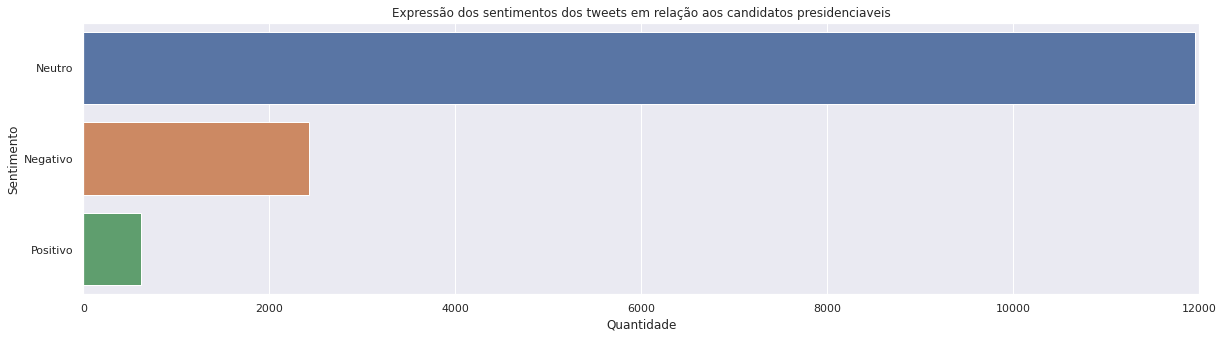

In [25]:
sns.set()
plt.figure(figsize=(20, 5))

#plt.figure(figsize=(10, 8))
#ax = sns.histplot(data = dataframe_sentimento, x = "Composicao", kde = True)
ax = sns.countplot(y="Sentimento_final", data=dataframe_sentimento)
ax.set_title("Expressão dos sentimentos dos tweets em relação aos candidatos presidenciaveis")
ax.set_ylabel("Sentimento")
ax.set_xlabel("Quantidade")
plt.xlim((0, 12000))
plt.show()

### Relação de sentimentos positivos nos tweets conforme candidatos presidenciáveis

In [26]:
#Filtro sentimentos por candidato
filtro_sentimento = dataframe_sentimento[["Candidato", "Sentimento_final"]]

In [27]:
#Filtro sentimentos positivos
filtro_sentimento_positivo = filtro_sentimento.query("Sentimento_final == 'Positivo'")

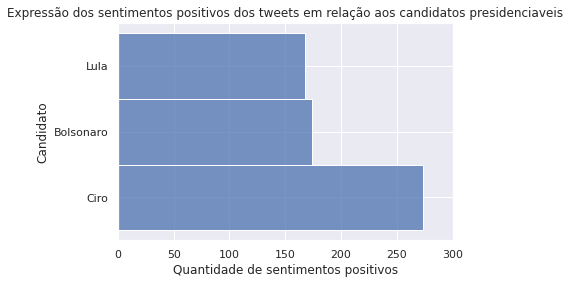

In [28]:


ax2 = sns.histplot(data = filtro_sentimento_positivo, y = "Candidato", kde = False)
ax2.set_title("Expressão dos sentimentos positivos dos tweets em relação aos candidatos presidenciaveis")
ax2.set_ylabel("Candidato")
ax2.set_xlabel("Quantidade de sentimentos positivos")
plt.xlim((0, 300))
plt.show()

#sns.scatterplot(data = dados_vendas_censo, x="V005", y="Valor_m2")

### Relação de sentimentos negativos nos tweets conforme candidatos presidenciáveis

In [29]:
#Filtro sentimentos negativos
filtro_sentimento_negativo = filtro_sentimento.query("Sentimento_final == 'Negativo'")

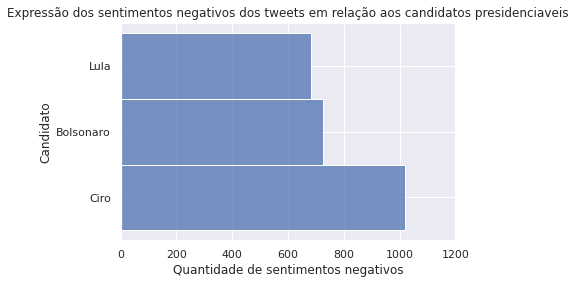

In [30]:
#Gráfico
ax3 = sns.histplot(data = filtro_sentimento_negativo, y = "Candidato", kde = False)
ax3.set_title("Expressão dos sentimentos negativos dos tweets em relação aos candidatos presidenciaveis")
ax3.set_ylabel("Candidato")
ax3.set_xlabel("Quantidade de sentimentos negativos")
plt.xlim((0, 1200))
plt.show()

### Relação de sentimentos neutros nos tweets conforme candidatos presidenciáveis



In [31]:
#Filtro sentimentos neutros
filtro_sentimento_neutro = filtro_sentimento.query("Sentimento_final == 'Neutro'")

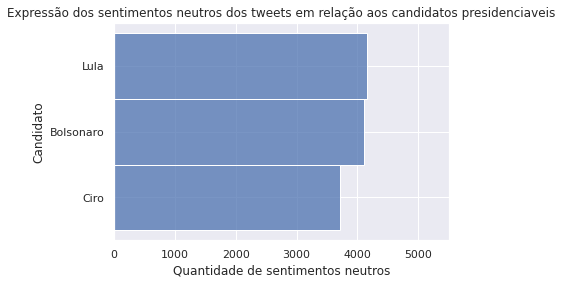

In [32]:
#Gráfico
ax4 = sns.histplot(data = filtro_sentimento_neutro, y = "Candidato", kde = False)
ax4.set_title("Expressão dos sentimentos neutros dos tweets em relação aos candidatos presidenciaveis")
ax4.set_ylabel("Candidato")
ax4.set_xlabel("Quantidade de sentimentos neutros")
plt.xlim((0, 5500))
plt.show()

###Relação de sentimentos por tweet do candidato Lula

In [45]:
#Filtro candidato Lula
filtro_sentimento_lula = filtro_sentimento.query("Candidato == 'Lula'")


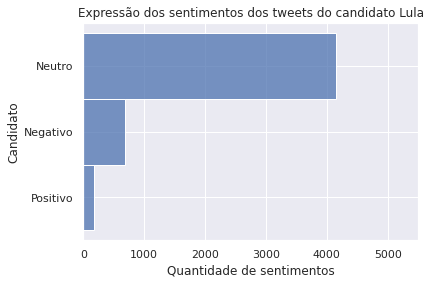

In [38]:
#Gráfico
ax5 = sns.histplot(data = filtro_sentimento_lula, y = "Sentimento_final", kde = False)
ax5.set_title("Expressão dos sentimentos dos tweets do candidato Lula")
ax5.set_ylabel("Candidato")
ax5.set_xlabel("Quantidade de sentimentos")
plt.xlim((0, 5500))
plt.show()

###Relação de sentimentos por tweet do candidato Bolsonaro

In [47]:
#Filtro candidato Bolsonaro
filtro_sentimento_bolsonaro = filtro_sentimento.query("Candidato == 'Bolsonaro'")


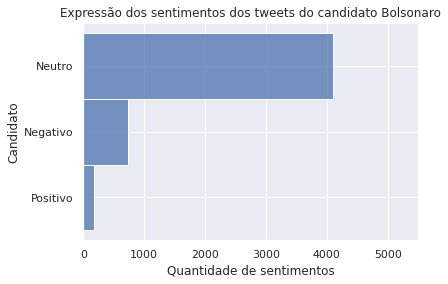

In [40]:
#Gráfico
ax6 = sns.histplot(data = filtro_sentimento_bolsonaro, y = "Sentimento_final", kde = False)
ax6.set_title("Expressão dos sentimentos dos tweets do candidato Bolsonaro")
ax6.set_ylabel("Candidato")
ax6.set_xlabel("Quantidade de sentimentos")
plt.xlim((0, 5500))
plt.show()

###Relação de sentimentos por tweet do candidato Ciro

In [41]:
#Filtro candidato Ciro
filtro_sentimento_ciro = filtro_sentimento.query("Candidato == 'Ciro'")

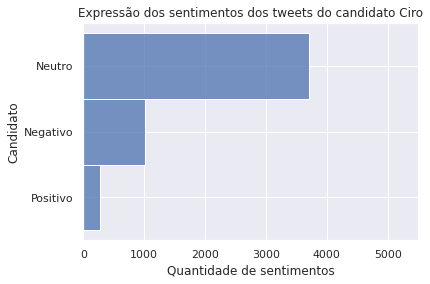

In [42]:
#Gráfico
ax7 = sns.histplot(data = filtro_sentimento_ciro, y = "Sentimento_final", kde = False)
ax7.set_title("Expressão dos sentimentos dos tweets do candidato Ciro")
ax7.set_ylabel("Candidato")
ax7.set_xlabel("Quantidade de sentimentos")
plt.xlim((0, 5500))
plt.show()

###Análises e próximas etapas:



1 - A quantidade de sentimentos negativos relacionados ao candidato Ciro Gomes é maior que dos demais candidatos - é um indicador do presidenciável ou a base de dados que não está ajustada corretamente?

**Resposta**: o cálculo do sentimento deve ser ajustado, para excluir determinadas palavras, como 'o','a' e outras palavras que atrapalham o algoritmo. Além disso, existem tweets em espanhol, o que pode indicar que a palavra 'ciro' seja do idioma ou país/região. 
- próxima atividade: pesquisar se é possível apenas tweets por localidade.

In [33]:
dataframe_sentimento.query("Candidato == 'Ciro'").tail(50)

,Data_hora,Id_Tweet,Tweet,Candidato,Tweet_limpo,Sentimento,Positivo,Negativo,Neutro,Composicao,Sentimento_final
14950,2022-08-02 17:13:31+00:00,1554515753134690305,@jonesmanoel_PCB O Loola fala merd@ contra min...,Ciro,o loola fala merd@ contra minorias e não vejo...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,Neutro
14951,2022-08-02 17:13:27+00:00,1554515736688730115,@BrazilFight Cara não dá pra levar a sério opn...,Ciro,cara não dá pra levar a sério opniões de polí...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,Neutro
14952,2022-08-02 17:13:21+00:00,1554515710038138880,@cirogomes Mudou que Lula é o primeiro e o alv...,Ciro,mudou que lula é o primeiro e o alvo de ciro ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,Neutro
14953,2022-08-02 17:13:21+00:00,1554515710004576257,@XChrisRed @CiroGomezL @m_ebrard @MercedesBenz...,Ciro,no solo son autos también son camiones y m...,"{'neg': 0.087, 'neu': 0.913, 'pos': 0.0, 'comp...",0.000,0.087,0.913,-0.2960,Negativo
14954,2022-08-02 17:13:19+00:00,1554515703432101891,@jivagoachkar @marcosvinbor @AnonNovidades @ga...,Ciro,"essa é a narrativa que o.""mercado"" quer f...","{'neg': 0.0, 'neu': 0.962, 'pos': 0.038, 'comp...",0.038,0.000,0.962,0.2500,Positivo
14955,2022-08-02 17:13:02+00:00,1554515630715543552,"O sonho de qlqr partido de ""terceira via"" era ...",Ciro,"o sonho de qlqr partido de ""terceira via"" era ...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,Neutro
14956,2022-08-02 17:12:55+00:00,1554515602185797635,"Eu já acho, novamente, que ele poderia fazer o...",Ciro,"eu já acho, novamente, que ele poderia fazer o...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,Neutro
14957,2022-08-02 17:12:52+00:00,1554515588797677570,"@joicehasselmann Temer, se não for ele, apoio ...",Ciro,"temer, se não for ele, apoio ciro.","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,Neutro
14958,2022-08-02 17:12:48+00:00,1554515572016254977,@andremarianors Está na hora da Tebet abrir mã...,Ciro,está na hora da tebet abrir mão em favor do c...,"{'neg': 0.0, 'neu': 0.945, 'pos': 0.055, 'comp...",0.055,0.000,0.945,0.4019,Positivo
14959,2022-08-02 17:12:48+00:00,1554515570523086848,@aeciodepapelao O Ciro falando de passear no e...,Ciro,o ciro falando de passear no exterior kkkkkkkk,"{'neg': 0.239, 'neu': 0.761, 'pos': 0.0, 'comp...",0.000,0.239,0.761,-0.2960,Negativo


2 - A quantidade de sentimentos neutros é realmente maioria, visto que 2022 é ano eleitoral ou dos indicadores (Composição, Positivo, Negativo) não estão bem ajustados?

**Resposta**: para isso, usar gráfico de dispersão para verificar como estão distribuídos os valores em "Composicao" em relação aos termos "Neutro", "Positivo" e "Negativo". Será que a regra abaixo está bem ajustada (usada na célula 13)?
- Se composicao >= 0.05 então tweet é positivo?
- Se composicao <= -0.05 então tweet é negativo?
- Senão é neutro?

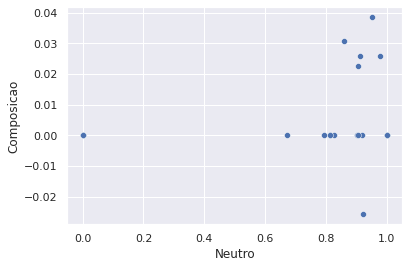

In [34]:
#filtro composicao
filtro_sentimento_composicao = dataframe_sentimento[["Candidato", "Neutro","Positivo", "Negativo", "Composicao","Sentimento_final"]]

#Quão estão distribuídos os valores "Neutros" com base na Composicao
sns.scatterplot(data = filtro_sentimento_composicao.query("Sentimento_final == 'Neutro'"), x="Neutro", y="Composicao")

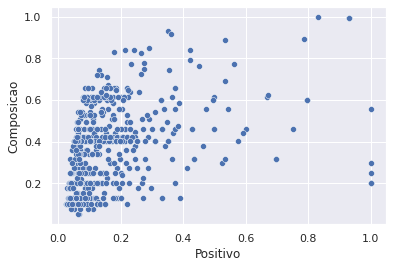

In [35]:
#Quão estão distribuídos os valores "Positivos" com base na Composicao
sns.scatterplot(data = filtro_sentimento_composicao.query("Sentimento_final == 'Positivo'"), x="Positivo", y="Composicao")

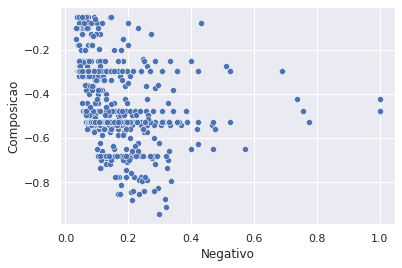

In [36]:
#Quão estão distribuídos os valores "Negativos" com base na Composicao
sns.scatterplot(data = filtro_sentimento_composicao.query("Sentimento_final == 'Negativo'"), x="Negativo", y="Composicao")

**Próximos passos:** interpretar a distribuição dos valores positivos, negativos e neutros com base na composicao e fazer ajustes necessários.